# Prevendo a nota do ENEM 2016 de matemática - Machine Learning 

Neste post irei mostrar todos os passos na criação de um modelo preditivo de Machine Learnig para prever a nota de matemática do ENEM 2016.  

Esse foi um desafio que participei da codenation para o programa de acleradev em Data Science no qual obtive um score de 93,2% 

## 1 - primeiro passo 
 Para elaboração desse modelo foi utilizado algumas bibliotecas, para maior facilidade indico baixar o anaconda no qual já tem todas essas bibliotecas.

# 2 - O que foi fornecido  e pedido pela codenation

- foi fornecido 2 arquivos um train.csv e test.csv
- Este arquivo, e apenas ele, deve ser utilizado para todos os desafios
- No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.
- Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

# 3 - Implementação 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#lendo os arquivos
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
traindf = train[['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]


traindf = traindf[traindf['NU_NOTA_MT'].notna()]


### O que tem nas colunas 

In [5]:
traindf.columns

Index(['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024',
       'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

####  Como tem uma quantidade razoável de colunas, vamos analisar  quais tem maior correlação com NU_NOTA_MT
- As colunas que tiverem correlação menor 0.06 vão ser eliminadas



In [8]:
corr_col = traindf.corr()["NU_NOTA_MT"].drop(['TP_DEPENDENCIA_ADM_ESC','TP_ENSINO'])

In [9]:
corr

Unnamed: 0                 0.006530
NU_ANO                          NaN
CO_MUNICIPIO_RESIDENCIA    0.108850
CO_UF_RESIDENCIA           0.107493
NU_IDADE                   0.061485
                             ...   
Q037                       0.265249
Q038                       0.202259
Q039                       0.019360
Q040                       0.119997
Q041                       0.131795
Name: NU_NOTA_MT, Length: 107, dtype: float64

In [15]:
f_corr = corr_col[abs(corr_col)>0.06].drop(['NU_NOTA_MT']) #excluindo os dois ultimos pois tem muito null
f_corr.shape

(15,)

###  Com isso resta essas colunas, que são as que vão usadas no modelo 

In [18]:
col_filter = list(f_corr.index)
col_filter.append('NU_NOTA_MT')
print(col_filter)


['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']


In [232]:
print(a&b)

{'NU_NOTA_COMP3', 'TP_ST_CONCLUSAO', 'TP_LINGUA', 'NU_IDADE', 'NU_NOTA_COMP5', 'CO_UF_RESIDENCIA', 'TP_ESCOLA', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP2', 'TP_ENSINO', 'TP_COR_RACA', 'NU_NOTA_LC', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP4', 'NU_NOTA_CN'}


### Tratando os NaN, para isso tem outras opções do que se pode fazer, no meu caso vou remover


In [39]:
f_train = train[col_filter].fillna(0)
f_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_UF_RESIDENCIA  13730 non-null  int64  
 1   NU_IDADE          13730 non-null  int64  
 2   TP_COR_RACA       13730 non-null  int64  
 3   TP_ST_CONCLUSAO   13730 non-null  int64  
 4   TP_ESCOLA         13730 non-null  int64  
 5   NU_NOTA_CN        13730 non-null  float64
 6   NU_NOTA_CH        13730 non-null  float64
 7   NU_NOTA_LC        13730 non-null  float64
 8   TP_LINGUA         13730 non-null  int64  
 9   NU_NOTA_COMP1     13730 non-null  float64
 10  NU_NOTA_COMP2     13730 non-null  float64
 11  NU_NOTA_COMP3     13730 non-null  float64
 12  NU_NOTA_COMP4     13730 non-null  float64
 13  NU_NOTA_COMP5     13730 non-null  float64
 14  NU_NOTA_REDACAO   13730 non-null  float64
 15  NU_NOTA_MT        13730 non-null  float64
dtypes: float64(10), int64(6)
memory usage: 1

In [40]:
#f_train = train[col_filter].fillna(0)
#f_train =train[]

### Agora com os dados tratados, criando o modelo de regressão
- Atribuir y_train ao meu target
- Setar x_test e x_train com as colunas selecionadas
- Normalizar os dados

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
f_train.columns

Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'NU_NOTA_MT'],
      dtype='object')

In [43]:
y = f_train['NU_NOTA_MT']
x = f_train.drop(columns=['NU_NOTA_MT'])#TIROU A COLUN ADE MATEMATICA

In [44]:
x.columns

Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [45]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=101)

### O modelo que usei para fazer a regressão, no caso foi o LinearRegression.

In [46]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [47]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
prediction = lm.predict(x_test)

In [49]:
prediction

array([4.31733307e+02, 4.64076939e+02, 4.21582422e+02, ...,
       4.76933585e+02, 2.10807451e-01, 4.96266081e+02])

### A variável prediction está com o previsão da nota de matemática do arq train, mas o que queremos mesmo é do arquivo test, isso foi feito apenas para testar o modelo e ver o quão bom ele, já que já temos esses valores e podemos testar se ele prever o que queremos

### Vamos criar um gráfico para confrontar os valores reais contra os valores previstos

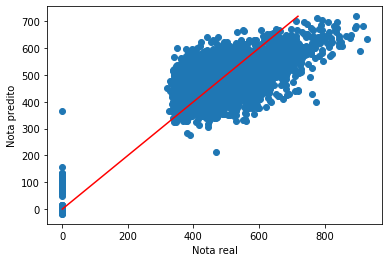

In [50]:
plt.scatter(y_test, prediction)
range = [y_test.min(),prediction.max()]
plt.plot(range, range, 'red')
plt.xlabel('Nota real')
plt.ylabel('Nota predito')
plt.show()

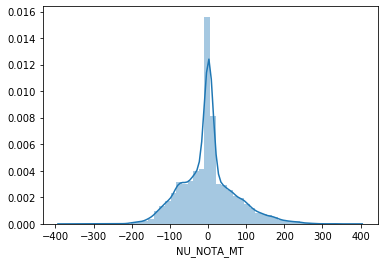

In [51]:
sns.distplot((y_test - prediction))

### O primeiro gráfico  da  regressão linear sugere que a nossa reta se adaptou razoavelmente bem aos nossos dados, pois é possível ver que os dados ficaram agrupados com  alguns pequenos erros. Talvez as métricas nos digam mais sobre isso.

In [52]:
from sklearn import metrics

### Mean Absolute Error ou Erro Médio Absoluto
Esta é certamente a métrica de qualidade mais básica que há para se analisar uma regressão. Para explicá-la, eu preciso que você observe a imagem acima, e considere a distância entre a reta vermelha e os pontos azuis como erros. O Erro Médio Absoluto é a soma de todos esses erros divido pelo número de pontos.

In [53]:
print("MAE", metrics.mean_absolute_error(y_test,prediction))



MAE 49.81184408533235


### Mean Squared Error ou Erro Médio Quadrático
O Erro Médio Quadrático tem como base o Erro Médio Absoluto, contudo, o erro (distância entre os pontos e a reta) é elevado ao quadrado.

In [54]:
print("MSE", metrics.mean_squared_error(y_test,prediction))

MSE 4988.018872722111


### Cross Validation ou Validação Cruzada
A Validação Cruzada testa como o modelo se comporta diante de dados que não foram usados como treinamento.

In [55]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,prediction)))

RMSE 70.62590794263895


#### É possível ver que tem erro o que é normal por ser uma previsão, mas é viável aplicar o modelo por ter um erro pequeno

## Agora é a hora mais esperada, o qual é o verdadeiro objetivo, prever as notas de matemáticas do arquivo test, com o modelo criado

In [60]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

### Primeira coisa que temos que fazer é deixar o mesmo numero de coluna e as mesma colunas das que treinamos o modelo, e já vamos tirar os NaN 

   ### Importante no desafio pede para respostar conter a nota de matemática e o númerico de inscrição, então vamos colocar o NU_INSCRICAO com index

In [63]:
fitest = test.set_index('NU_INSCRICAO')
ftest = fitest[x.columns].fillna(0)
ftest

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,,,,,,,,,,,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,22,3,1,1,464.8,443.5,431.8,0,120.0,80.0,80.0,100.0,40.0,420.0
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,26,3,1,1,391.1,491.1,548.0,1,120.0,120.0,120.0,120.0,100.0,580.0
b38a03232f43b11c9d0788abaf060f7366053b6d,23,21,1,2,2,595.9,622.7,613.6,0,80.0,40.0,40.0,80.0,80.0,320.0
70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,27,3,1,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
715494628a50142ce8cb17191cfe6d0f3cae0934,41,18,1,2,2,592.9,492.6,571.4,1,100.0,80.0,60.0,80.0,0.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,17,1,2,2,398.3,558.2,511.6,0,120.0,120.0,120.0,100.0,40.0,500.0
a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,17,2,2,2,427.6,579.7,471.1,1,100.0,100.0,100.0,120.0,100.0,520.0
655fa6306720ff16e825903b5422a46608a77545,35,19,1,1,1,639.2,643.8,604.9,0,160.0,140.0,120.0,140.0,80.0,640.0


In [65]:
ftest.dtypes

CO_UF_RESIDENCIA      int64
NU_IDADE              int64
TP_COR_RACA           int64
TP_ST_CONCLUSAO       int64
TP_ESCOLA             int64
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
TP_LINGUA             int64
NU_NOTA_COMP1       float64
NU_NOTA_COMP2       float64
NU_NOTA_COMP3       float64
NU_NOTA_COMP4       float64
NU_NOTA_COMP5       float64
NU_NOTA_REDACAO     float64
dtype: object

# E agora é a hora da verdade, vamos saber as notas de matemática de 2016 prevista pelo modelo

In [66]:
prediction = lm.predict(ftest)

In [68]:
prediction.shape

(4576,)

In [70]:
ftest['NU_NOTA_MT'] = prediction

In [71]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


### Vamos salvar da forma que é pedido, número de inscrição e Nota de matemática em um arquivo 

In [72]:
resp = ftest['NU_NOTA_MT']
resp.head()

NU_INSCRICAO
73ff9fcc02f0a99919906c942c2e1a1042cdcf98    425.555553
71a95f9f1b91a82c65ad94abbdf9f54e6066f968    474.621649
b38a03232f43b11c9d0788abaf060f7366053b6d    571.316141
70b682d9a3636be23f6120fa9d6b164eb3c6002d     -2.946823
715494628a50142ce8cb17191cfe6d0f3cae0934    550.340316
Name: NU_NOTA_MT, dtype: float64

In [73]:
with open('answer.csv','w',newline='\n') as f:
    f.write(resp.to_csv(line_terminator=None))